<a href="https://colab.research.google.com/github/dlhegend/-TS_Academy_Capstone_Project/blob/main/notebooks/Abosi_Chijioke_TSA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **CAPSTONE PROJECT**

## **Time Series Analysis**

## **Data Preprocessing**

In [1]:
# To take care of unwanted error message displays
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing all required libraies
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [5]:
# Reading in the dataset
df = pd.read_csv("/content/NGX_ASI_Index_Price_Data.csv")

In [7]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   137 non-null    object 
 1   avr_monthly_kiloprice  137 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [6]:
# Checking the first 5 data in the dataset
df.head()

,date,avr_monthly_kiloprice
0,2012-Jan,20.80
1,2012-Feb,20.52
2,2012-Mar,20.92
3,2012-Apr,21.27
4,2012-May,22.41


In [12]:
df['Month'] = pd.to_datetime(df['date'])
df.set_index('Month', inplace=True)

In [13]:
df.head()

,date,avr_monthly_kiloprice
Month,,
2012-01-01,2012-Jan,20.80
2012-02-01,2012-Feb,20.52
2012-03-01,2012-Mar,20.92
2012-04-01,2012-Apr,21.27
2012-05-01,2012-May,22.41


## **Exploratory Data Analysis (EDA)**

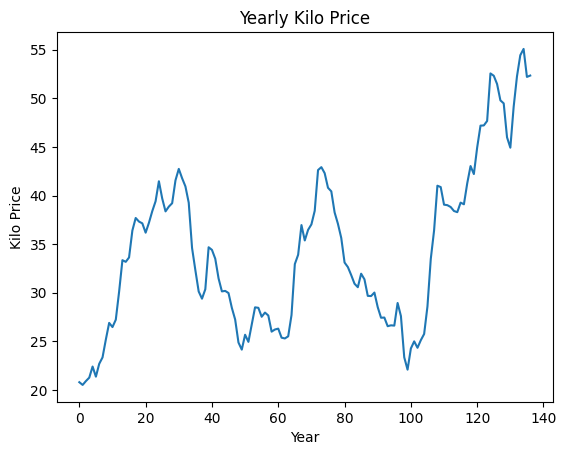

In [9]:
df['avr_monthly_kiloprice'].plot(title="Yearly Kilo Price")
plt.xlabel("Year")
plt.ylabel("Kilo Price")
plt.show()

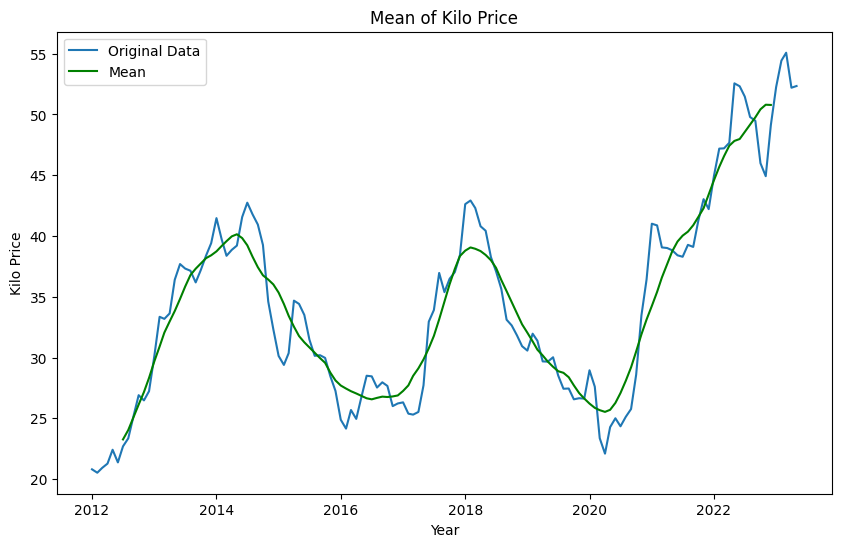

In [18]:
df['Trend'] = df['avr_monthly_kiloprice'].rolling(window=12, center=True).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['avr_monthly_kiloprice'], label='Original Data')
plt.plot(df['Trend'], label='Mean', color='green')
plt.title('Mean of Kilo Price')
plt.xlabel('Year')
plt.ylabel('Kilo Price')
plt.legend()
plt.show()

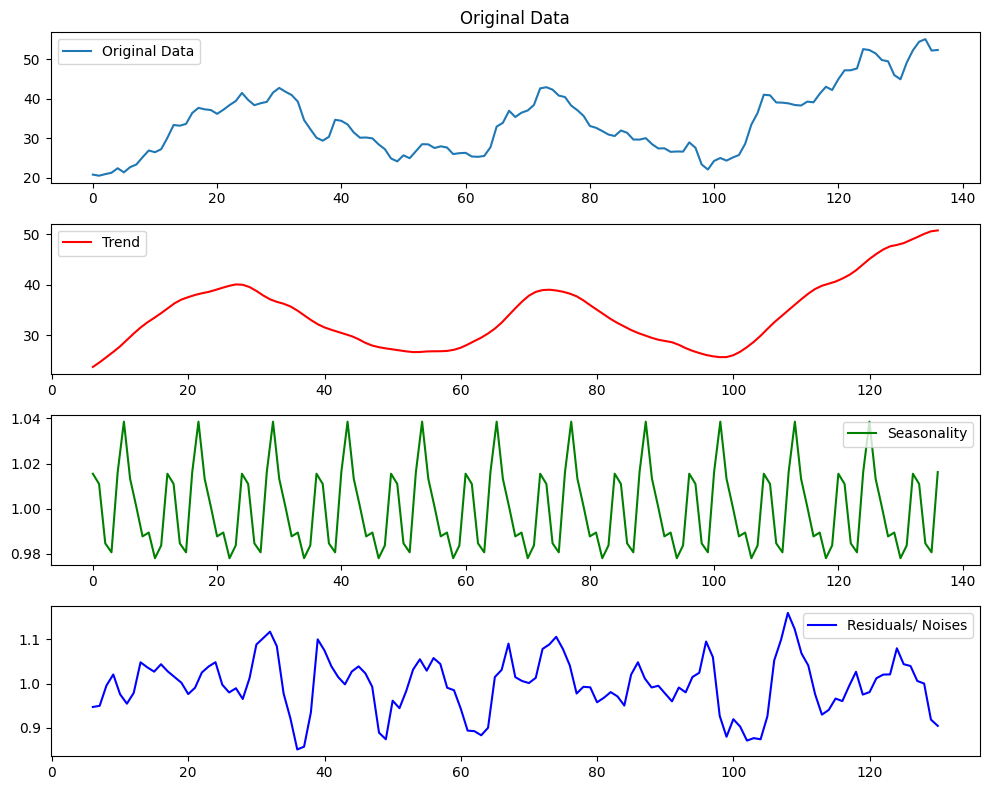

In [8]:
decomposition = seasonal_decompose(df['avr_monthly_kiloprice'], model='multiplicate', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df['avr_monthly_kiloprice'], label='Original Data')
plt.title('Original Data')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper right')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals/ Noises', color='blue')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [25]:
result = adfuller(df['avr_monthly_kiloprice'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
  print('The series is stationary')
else:
  print('The series is non-stationary')

print(result)

ADF Statistic: -1.6879689803233129
p-value: 0.4373216371351407
The series is non-stationary
(np.float64(-1.6879689803233129), np.float64(0.4373216371351407), 1, 135, {'1%': np.float64(-3.479742586699182), '5%': np.float64(-2.88319822181578), '10%': np.float64(-2.578319684499314)}, np.float64(482.9690778425961))


In [33]:
df['Detrended_Ratio'] = df['avr_monthly_kiloprice'] / df['Trend']

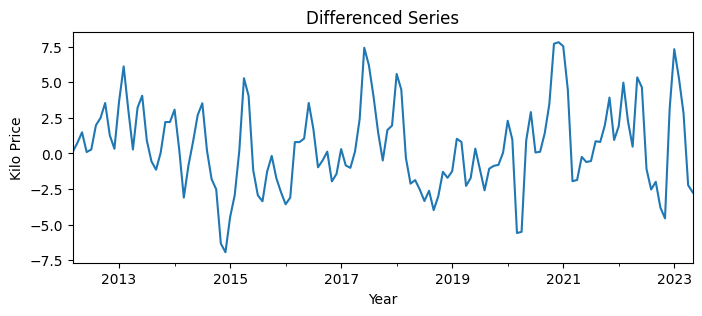

In [35]:
df['Diff_1'] = df['avr_monthly_kiloprice'] - df['avr_monthly_kiloprice'].shift(2)
df_diff = df['Diff_1'].dropna()
df_diff.plot(title="Differenced Series", figsize=(8, 3))
plt.xlabel("Year")
plt.ylabel("Kilo Price")
plt.show()

In [36]:
result_diff = adfuller(df_diff)

print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
if result_diff[1] <= 0.05:
  print('The series is stationary')
else:
  print('The series is non-stationary')

print(result_diff)

ADF Statistic: -3.863816803486728
p-value: 0.002317875265375661
The series is stationary
(np.float64(-3.863816803486728), np.float64(0.002317875265375661), 4, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(500.6076614805527))


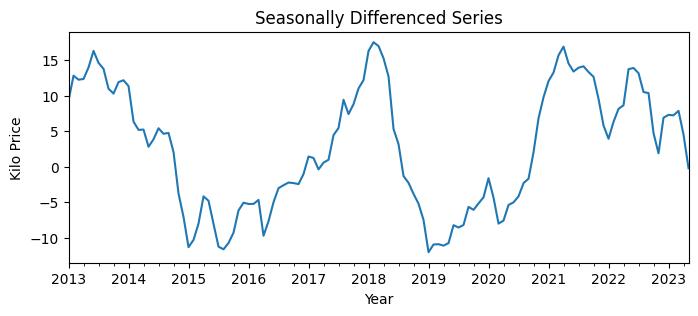

In [37]:
df['Seasonal_First_Difference'] = df['avr_monthly_kiloprice'] - df['avr_monthly_kiloprice'].shift(12)
df_seasonal = df['Seasonal_First_Difference'].dropna()

df_seasonal.plot(title="Seasonally Differenced Series", figsize=(8, 3))
plt.xlabel("Year")
plt.ylabel("Kilo Price")
plt.show()

In [38]:
result = adfuller(df_seasonal)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
  print('The series is stationary')
else:
  print('The series is non-stationary')

print(result)

ADF Statistic: -2.2818008462141313
p-value: 0.17790475474067885
The series is non-stationary
(np.float64(-2.2818008462141313), np.float64(0.17790475474067885), 13, 111, {'1%': np.float64(-3.490683082754047), '5%': np.float64(-2.8879516565798817), '10%': np.float64(-2.5808574442009578)}, np.float64(482.2020353332375))
